In [18]:
%matplotlib inline

In [19]:
import numpy as np
import os
import time

In [20]:
import matplotlib
import matplotlib.pyplot as plt

In [21]:
def plot_seg(seg, border=False):
    unique, unique_inverse = np.unique(seg, return_inverse=True)
    N = len(unique)
    cmap = np.random.rand(N,3)
    if border:
        cmap[0,:] = 0
    cmap = matplotlib.colors.ListedColormap(cmap)
    plt.imshow(np.arange(N)[unique_inverse].reshape(seg.shape), cmap=cmap)

## Pinky-golden (mip1)

In [22]:
import evaluator

In [23]:
from types import SimpleNamespace

In [24]:
d = dict()

d['gs_input'] = 'gs://neuroglancer/kisuk/pinky/golden/seg_valid'
d['dtype']   = 'uint32'
d['in_mip']   = 1
d['begin']   = (0,0,0) 
d['end']     = None
d['center']  = None
d['size']    = (2048,2048,256)
d['cache']   = True
d['parallel'] = 8

opt = SimpleNamespace(**d)

In [25]:
gt = evaluator.cutout(opt, dtype=opt.dtype)

gs://neuroglancer/kisuk/pinky/golden/seg_valid
begin = (0, 0, 0)
end = (2048, 2048, 256)
mip 0 = [slice(0, 2048, None), slice(0, 2048, None), slice(0, 256, None)]
mip 1 = [slice(0, 1024, 1), slice(0, 1024, 1), slice(0, 256, 1)]


Downloading:  77%|███████▋  | 98/128 [00:07<00:02, 13.22it/s]

Downloading:  79%|███████▉  | 101/128 [00:08<00:01, 14.79it/s]
Downloading: 254it [00:09, 32.22it/s]                         
Downloading: 252it [00:09, 27.05it/s]                         
Downloading: 246it [00:09, 29.79it/s]                         
Downloading: 250it [00:09, 29.73it/s]                         


In [26]:
print(gt.shape)

(256, 1024, 1024)


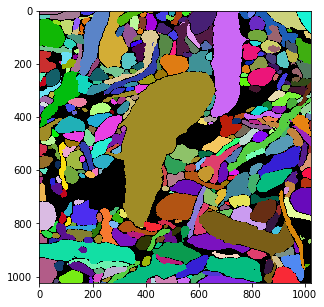

In [27]:
z = 128
plt.figure(figsize=(5,5))
plot_seg(gt[z,:,:], border=True)
plt.show()

## Save

In [28]:
import h5py
import os

In [29]:
home = os.path.expanduser('~')
base = os.path.join(home, 'Data_local/datasets')
print(base)

/usr/people/kisuk/Data_local/datasets


In [30]:
out_path = os.path.join(base, 'pinky/ground_truth/golden_volume/mip1')
print(out_path)

/usr/people/kisuk/Data_local/datasets/pinky/ground_truth/golden_volume/mip1


In [31]:
fpath = os.path.join(out_path, "seg_valid.h5")
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=gt.astype(np.uint32))